In [2]:
import pandas as pd
import json
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import json
import numpy as np
%matplotlib inline

In [3]:
def read_csv(fname):
    #f = lambda x : json.loads(x.replace("'","\""))
    #df = pd.read_csv(fname, converters={'sensor_type': f}, index_col=0)
    df = pd.read_csv(fname, index_col=0)
    return df

In [4]:
def save_graph(plot, fname='saved.png'):
    fig = plot.get_figure()
    fig.savefig(fname)

In [51]:
keys = {'all': ['ma_window', 'sensor_type', 'n_record', 'n_train', 'ms_interval'],
        'kNN': ['n_neighbors', 'algorithm'],
        'LOF': ['n_neighbors', 'algorithm'],
        'k-means': ['n_clusters', 'max_iter'],
        'NN': ['num_of_hidden_nodes', 'num_of_training_epochs', 'size_of_mini_batch', 'learning_rate'],
       }

def df_values(_df):
    print('--- common')
    for c in keys['all']:
        if c == 'auc': continue
        print("%-40s%s" % (c, _df[c].unique()))

    print('--- kNN')
    for c in keys['kNN']:
        if c == 'auc': continue
        print("%-40s%s" % (c, _df[_df['type']=='kNN'][c].unique()))
    
    print('--- LOF')
    for c in keys['LOF']:
        if c == 'auc': continue
        print("%-40s%s" % (c, _df[_df['type']=='LOF'][c].unique()))
    
    print('--- k-means')
    for c in keys['k-means']:
        if c == 'auc': continue
        print("%-40s%s" % (c, _df[_df['type']=='k-means'][c].unique()))
    
    print('--- NN')
    for c in keys['NN']:
        if c == 'auc': continue
        print("%-40s%s" % (c, _df[_df['type']=='NN'][c].unique()))

In [66]:
def show_graph(df_list, columns, x_title, y_title):
    df_list = [df[[x_title, y_title]] for df in df_list]
    
    df_list = [df.rename(index=str, columns={y_title: c}) for df, c in zip(df_list, columns)]
    
    merge_df = df_list[0]
    for df in df_list[1:]:
        merge_df = merge_df.merge(df, on=[x_title], how='outer')
    
    v = merge_df[columns].values
    v_max, v_min = np.nanmax(v), np.nanmin(v)
    v_range = v_max - v_min
    
    display(merge_df)
    merge_df.plot.bar(x=x_title, ylim=[v_min - v_range*0.1, v_max + v_range*0.2])

,n_train,kNN,LOF,k-menas,NN
0,5,0.934722,0.904306,0.944074,0.945046
1,10,0.947546,0.943102,0.944259,0.947685
2,20,0.962176,0.909583,0.957176,0.961389
3,100,0.953565,0.902639,0.952407,0.955648
4,1,NaN,NaN,0.906111,0.898519


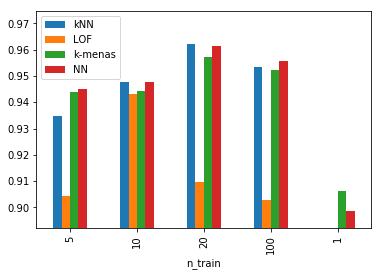

In [114]:
#csv_file = 'test_record_02_11_01__^02_11__^02_1[23].csv'
csv_file = 'test_record_02_01_01__^02_01__^02_0[23].csv'
df = read_csv(csv_file)

_d = df[
    (df['n_record'] == 1) & 
    (df['ms_interval'] == 20) &
    (df['sensor_type'].apply(lambda x: 'gyro.rotationRate' in x))
]
#df_values(_d)

_d_knn = _d[(_d['type']=='kNN') & (_d['n_neighbors'] == 5)]
_d_nn  = _d[(_d['type']=='NN') & (_d['num_of_hidden_nodes'] == 32)]
_d_lof = _d[(_d['type']=='LOF') & (_d['n_neighbors'] == 5)]
_d_kms = _d[(_d['type']=='k-means') & (_d['n_clusters'] == 1)]

show_graph([_d_knn, _d_lof, _d_kms, _d_nn], ['kNN',  'LOF', 'k-menas', 'NN'], 'n_train', 'auc')

total 16146 results
--- common
ma_window                               [1]
sensor_type                             [ '["rssi.a", "rssi.b", ["gyro.rotationRate.x", "gyro.rotationRate.y", "gyro.rotationRate.z"]]']
n_record                                [-20  -5  -1   1   5  20]
n_train                                 [5]
ms_interval                             [20]
--- kNN
n_neighbors                             []
algorithm                               []
--- LOF
n_neighbors                             []
algorithm                               []
--- k-means
n_clusters                              []
max_iter                                []
--- NN
num_of_hidden_nodes                     [  4.   8.  16.  32.]
num_of_training_epochs                  [ 100.]
size_of_mini_batch                      [ 10.]
learning_rate                           [ 0.02]


,num_of_hidden_nodes,nn-20,nn-5,nn-1,nn0,nn1,nn5,nn20
0,4.0,0.991574,0.974074,0.948611,NaN,0.945694,0.956481,0.987361
1,8.0,0.991574,0.973704,0.948565,NaN,0.944907,0.956343,0.987222
2,16.0,0.991019,0.973287,0.947963,NaN,0.944954,0.956435,0.986852
3,32.0,0.990972,0.973935,0.948426,NaN,0.945046,0.956204,0.987037


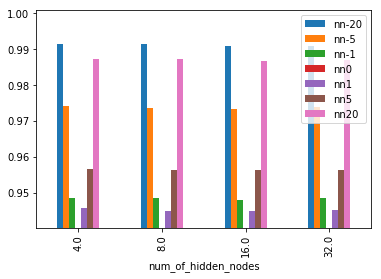

In [104]:
#csv_file = 'test_record_02_11_01__^02_11__^02_1[23].csv'
csv_file = 'test_record_02_01_01__^02_01__^02_0[23].csv'
#csv_file = 'test_record_01_01_01__^01_01__^01_0[23].csv'
df = read_csv(csv_file)
print('total %d results'%(len(df)))

_d = df[
    (df['n_train'] == 5) & 
    (df['ma_window'] == 1) &
    (df['ms_interval'] == 20) &
    (df['sensor_type'].apply(lambda x: 'gyro.rotationRate' in x))
]

_d  = _d[_d['type']=='NN']
df_values(_d)

_d_m20 = _d[_d['n_record'] == -20]
_d_m5 = _d[_d['n_record'] == -5]
_d_m1 = _d[_d['n_record'] == -1]
_d_0 = _d[_d['n_record'] == 0]
_d_1 = _d[_d['n_record'] == 1]
_d_5 = _d[_d['n_record'] == 5]
_d_20 = _d[_d['n_record'] == 20]

#display(_d_nn)

show_graph([_d_m20, _d_m5, _d_m1, _d_0, _d_1, _d_5, _d_20], ['nn-20', 'nn-5', 'nn-1', 'nn0', 'nn1', 'nn5', 'nn20'], 'num_of_hidden_nodes', 'auc')